In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 200)

In [3]:
LLM_EVALUATIONS_FILENAME="retrieval_pipelines/LLM_top_001_gpt-4_validation_queries_evaluation_20230628_191254.tsv"

GPT3_EVALUATIONS_FILENAME="retrieval_pipelines/LLM_top_001_gpt-3.5-turbo_validation_queries_evaluation_20230628_184757.tsv"

LLM_EVALUATIONS_FOLDER="retrieval_pipelines"

In [4]:
llm_df = pd.read_csv(LLM_EVALUATIONS_FILENAME, sep='\t')

In [5]:
llm_df

,Unnamed: 0,score,reasoning,usage,cost,duration,query_text,colbertx_id,doc_text,mt5_score,colbertx_score,bm25_score
0,00_clueweb22-pt0000-55-02859_2,0,"a passagem não responde à pergunta. Ela descreve as características da fauna e da flora de alguns biomas específicos do Brasil, mas não fornece uma resposta sobre qual é a maior característica da flora brasileira em geral.","{'prompt_tokens': 819, 'completion_tokens': 61, 'total_tokens': 880}",0.02823,4.419158,Qual a maior característica da flora brasileira?,5114489,"Fauna e flora brasileirasNo Brasil, a fauna e a flora estão divididas entre os seis biomas predominantes no país. Algumas espécies de plantas e animais estão presentes em mais de um bioma, outras, por sua vez, são específicas de um ecossistema.Veja as principais características da fauna e da flora nos biomas brasileiros:Fauna e flora do CerradoFauna do Cerrado - Mais de 300 mil espécies de animais, dos quais se destacam, além do tamanduá-bandeira, o lobo-guará, a águia-cinzenta e a jaguatirica, ambos ameaçados de extinção.Flora do Cerrado - Vegetação rasteira e árvores esparsas de médio e pequeno porte, com folhas grossas e raízes profundas. Cerca de 4 mil espécies de plantas existentes no cerrado são endêmicas, ou seja, só se desenvolvem nesse local.As queimadas e o tráfico de animais são obstáculos para a preservação do bioma.Veja também: C errado.Fauna e flora da CaatingaFauna da Caatinga - diversas espécies de mamíferos, lagartos, peixes e aves (como a famosa asa-branca cantada por Luís Gonzaga).Flora da Caatinga - Vegetação resistente ao solo do semiárido brasileiro. Algumas espécies possuem sua própria reserva de água para os períodos de seca. Diversas espécies de cactáceas, arbustos e vegetação rasteira.Veja também:Caatinga.Fauna e flora do Pantanal",-0.010127,3.749638,NaN
1,01_clueweb22-pt0001-22-15255_0,10,"a passagem responde claramente à pergunta, indicando que a maior característica da fauna brasileira é a sua diversidade, sendo provavelmente a que possui a maior diversidade em espécies de animais vertebrados, anfíbios e primatas do globo terrestre. Além disso, a passagem fornece detalhes adicionais sobre a diversidade de espécies no Brasil.","{'prompt_tokens': 779, 'completion_tokens': 100, 'total_tokens': 879}",0.02937,6.509689,Qual a maior característica da fauna brasileira?,38724,"Fauna do Brasil - Toda MatériaBiologia›ZoologiaFauna do BrasilA fauna do Brasil é provavelmente a que possui a maior diversidade em espécies de animais vertebrados, anfíbios e primatas do globo terrestre.Existem três vezes mais espécies de peixes de água doce no Brasil do que em qualquer lugar no mundo. As aves também são muito variadas, colocando o Brasil como o país com a maior variedade de espécies na América do Sul e o terceiro do mundo em espécies de mamíferos.De igual modo, a Floresta Atlântica está entre as cinco regiões do planeta com mais espécies nativas, das quais 17% são aves e 10% são anfíbios e mamíferos encontrados somente na fauna brasileira. Vale citar que os animais da fauna brasileira são, via de regra, de pequeno porte.A importância científica da fauna brasileira é indescritível, pois contém a maior biodiversidade do mundo (cerca de 100 mil espécies de invertebrados, 8200 espécies vertebrados (713 mamíferos, 1826 aves, 721 répteis, 875 anfíbios, 2800 peixes continentais e 1300 peixes marinhos) das quais 627 já estão na lista negra das espécies ameaçadas de extinção (394 espécies terrestres e 233 espécies aquáticas).",-0.009462,NaN,NaN
2,02_clueweb22-pt0001-73-10674_5,10,"a passagem responde claramente à pergunta, indicando que as federações ou associações nacionais do Suriname e da Guiana estão afiliadas à CONCACAF, e não à CONMEBOL.","{'prompt_tokens': 848, 'completion_tokens': 59, 'total_tokens': 907}",0.02898,4.429005,Por que os países Guiana e Suriname não são filiados a Conmebol?,5590110,"Dez associações nacionais de futebol pertencem à CONMEBOL, representando todos os estados independentes da Amér

### Check the overall generation cost

In [6]:
llm_df['cost'].sum()

7.918229999999991

In [8]:
llm_df['cost'].mean()

0.02711722602739723

In [7]:
llm_df['duration'].sum() // 60

19.0

### Check the LLM scores, and its distribution accross each retrieval system

In [11]:
np.sum(llm_df['score'] < 5)

194

In [12]:
np.sum(llm_df['score'] >= 5)

98

In [18]:
llm_df[llm_df['bm25_score'].isnull()]['score'].describe()

count    192.000000
mean       3.067708
std        4.225403
min        0.000000
25%        0.000000
50%        0.000000
75%        8.000000
max       10.000000
Name: score, dtype: float64

In [19]:
llm_df[llm_df['mt5_score'].isnull()]['score'].describe()

count    192.000000
mean       1.541667
std        3.261441
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       10.000000
Name: score, dtype: float64

In [20]:
llm_df[llm_df['colbertx_score'].isnull()]['score'].describe()

count    192.000000
mean       4.786458
std        4.457034
min        0.000000
25%        0.000000
50%        5.000000
75%       10.000000
max       10.000000
Name: score, dtype: float64

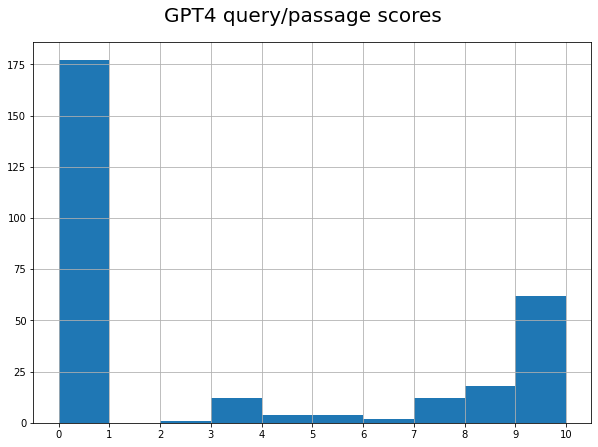

In [15]:
fig = plt.figure(figsize=[10,7])

plt.hist(llm_df['score'])

plt.xticks(list(range(11)))

plt.grid()

plt.suptitle("GPT4 query/passage scores", fontsize=20, y=0.95)

plt.show()

In [17]:
evaluations_order = np.random.permutation(llm_df.shape[0])

In [20]:
evaluations_order

array([ 86,  95,  79, 177,  75, 125,  31, 166,  58,  23,  10, 129,  53,
        66, 242, 283, 102, 120, 260, 135, 228,  56,  17,  12,  98, 167,
         7,  74,  73, 208, 153,  47, 215, 146, 155,  92, 264,  94,   9,
       108, 175, 287,  57, 121, 126, 288, 122, 251,   4, 112, 218, 176,
       237, 192,  45,  55, 231,  20,  13, 250, 272,  36, 172, 186, 284,
        15, 290, 223, 173, 258, 130, 200, 248,  91, 170,  78,   5, 226,
       147,  41, 190,  39,  54,  61, 113, 216,   0, 281, 188, 201,  64,
       207,  44, 278, 261,  59, 132, 137,  89, 157,  88, 138, 212, 269,
       106, 243, 119,  28, 114, 134, 255, 185, 221, 289, 145,  21, 105,
       280,  87, 128, 178, 254, 160,  85, 239, 274, 240,  16, 256, 277,
       182,  51, 111,   1, 123, 279, 238, 211, 245, 143, 191,  19,  42,
       109,  68,  82, 227,  83, 232, 103, 252, 219,  90,  71, 197, 184,
       257, 285, 275, 193, 131, 136, 273, 161, 246, 282, 107,  63, 210,
        26, 259, 127, 187,  97, 291,  25, 142, 217, 101, 115,  4

In [24]:
llm_df.iloc[evaluations_order][['query_text', 'doc_text', 'score', 'reasoning']].to_csv(os.path.join(LLM_EVALUATIONS_FOLDER, "human_validation_LLM_evaluations.tsv"),
                                                                                        sep='\t', index=False)

### Now, compare the scores distribution when GPT-3.5 was used as the annotator'

In [31]:
gpt3_df = pd.read_csv(GPT3_EVALUATIONS_FILENAME, sep='\t')

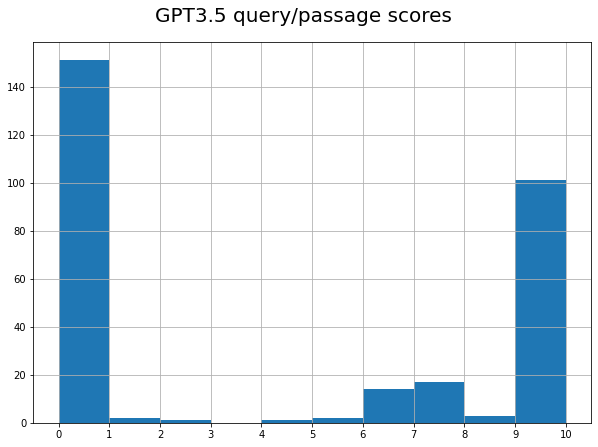

In [32]:
fig = plt.figure(figsize=[10,7])

plt.hist(gpt3_df['score'])

plt.xticks(list(range(11)))

plt.grid()

plt.suptitle("GPT3.5 query/passage scores", fontsize=20, y=0.95)

plt.show()

### Finally, check the human annotator correlation with GPT-4 annotations

In [21]:
human_df = pd.read_csv("retrieval_pipelines/human_validation_LLM_evaluations_eduseiti.tsv", sep='\t')

In [22]:
human_df.iloc[[0,3,5]]

,query_text,doc_text,score,reasoning,Human score,Human reasoning
0,Qual o relevo predominante do Brasil?,"32. (UDESC) Segundo Aziz Nacib Ab Saber, geógrafo, o relevo predominante no Brasil é:a) Depressão Central.b) Planícies e Terras Baixas.c) Planalto Brasileiro.d) Planície Costeira.e) Planalto das Guianas.33. (UDESC) Arede hidrográfica brasileira é composta por rios, em sua maioria perenes, e comgrande potencial para a geração de energia elétrica, pois se encontrampredominantemente em regiões de planalto. Analisando a rede hidrográficabrasileira, conclui-se que:I - Anavegação de maior porte é realizada em rios como os da bacia do Amazonas, osda bacia do Paraguai e em trechos do São Francisco.II - Os riosdas regiões Sul e Sudeste apresentam limitado potencial de navegação, sendonecessária,emalguns casos, a construção de eclusas como as do rio Tietê, no Estado de SãoPaulo.III - Abacia do rio Paraguai é a maior do Brasil, e onde se situa a maior usinahidrelétrica do país - aItaipu.IV - O rioUruguai nasce da junção dos rios Canoas e Pelotas.V - A bacia Platina é compostapelas bacias do Paraná, Uruguai e Tocantins que, juntas, formam a maior redenavegável do Brasil.Assinalea alternativa correta.a) Somente as afirmativas I e V são verdadeiras.b) Somente as afirmativas II, III e V são verdadeiras.c) Somente as afirmativas I, II e IV sãoverdadeiras.",10,"a passagem responde claramente à pergunta, indicando que, segundo o geógrafo Aziz Nacib Ab Saber, o relevo predominante no Brasil é o Planalto Brasileiro.",1.0,"A passagem repete a pergunta, mas como um enunciado de múltipla escolha."
3,Quantas vezes o voleibol feminino venceu o grand prix?,Vôlei Bauru[20]Brasil20172018Osasco Audax[21]Brasil20182019TítulosPela Seleção BrasileiraJuvenilCampeã do Campeonato Sul-americano de Voleibol Feminino Sub-20 2000Campeã do Campeonato Mundial de Voleibol feminino sub-20 2001AdultaCampeã do Campeonato Sul-Americano de Voleibol Feminino - 2003Vice-campeã da Copa do Mundo de Vôlei - 2003Campeã do Grand Prix - 2005Campeã do Montreux Volley Masters - 2005Campeã do Torneio de Courmayeur - 2005Vice-campeã do Campeonato Mundial de Voleibol - 2006Vice-campeã do Jogos Pan-Americanos - 2007Campeã do Campeonato Sul-Americano de Voleibol Feminino - 2007Vice-campeã da Copa do Mundo de Vôlei - 2007Campeã do Grand Prix - 2008Campeã dos Jogos Olímpicos de Pequim - 2008Campeã do Torneio de Voleibol Final Four - 2008Campeã do Campeonato Sul-Americano de Voleibol Feminino - Porto Alegre 2009Vice-campeã da Copa dos Campeões - Japão 2009Vice-campeã do Grand Prix de Vôlei - Ningbo 2010Campeã da Copa Pan-Americana de Voleibol Feminino - 2011Vice-campeã do Grand Prix de Vôlei - Macau 2011Campeã do Jogos Pan-Americanos - 2011Vice-campeã do Grand Prix de Vôlei - Ningbo 2012Campeã dos Jogos Olímpicos de Londres - 2012ClubesLeite Moça/JundiaíCampeã do Sul-americano de Clubes - 1997Campeã do Campeonato Paulista - 1997,10,"a passagem responde claramente à pergunta, indicando que o voleibol feminino venceu o Grand Prix três vezes (2005, 2008 e 2011).",1.0,"A passagem parece falar sobre o histórico de títulos de alguma jogadora de vólei, não da seleção brasileira. A soma indicada pelo LLM está incorreta."
5,Existem vantagens ao definir uma moeda única?,"2.6 - Como se manifestam as vantagens do euro .............................................. 8 2.7- Vantagens à escala mundial ........................................................................ 82.8 - Tirar pleno partido das vantagens ............................................................... 92.9 -….exibir maismoeda única3005 palavras | 13 páginasEscola Secundária/3 Rainha Santa Isabel de EstremozGeografiaMoeda Única Professor: José BarrosoTrabalho realizado por: Duarte Pereira Nº6 11ºG Ricardo Franco Nº18 11ºG….exibir maisKlugiugli349 palavras | 2 páginas4.3. A nova moeda portuguesa – o euroFases da união económica e Monetária• Existiram 3 fasesCritérios de convergência:• Inflação• Défice orçamental• Dívida pública• 

In [23]:
human_df.iloc[:20]['score'].corr(human_df.iloc[:20]['Human score'].astype(np.int64))

0.781340501060795

In [24]:
human_df.iloc[:20]['score'].corr(human_df.iloc[:20]['Human score'].astype(np.int64), method="kendall")

0.7921068799730557

In [36]:
human_df.iloc[:20][['score', 'Human score']]

,score,Human score
0,10,1
1,0,0
2,0,0
3,10,1
4,5,6
5,4,1
6,8,7
7,0,0
8,10,10
9,10,10
